<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/Churn_Prediction_ML_DL_Keras_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [196]:
# Hands on Session
# Churn- Bank Dataset




In [197]:
# Data
df=pd.read_csv('/content/drive/MyDrive/Intellipaat-Jan2026/Churn.csv')

In [198]:
df.shape

(10000, 14)

In [199]:
df['Tenure'].head(100)

,Tenure
0,2
1,1
2,8
3,1
4,2
...,...
95,10
96,9
97,8
98,8


# EDA
### Univariate Analysis - Split your features into categorical and numerical and then find Univariate distribution as well as any insights that you can find.
### Bivariate Analysis - Correlation between different values

# Feature Engineering

In [200]:

# add a missing value to Age column
# df.loc[4,'Age']=np.nan
# for idx in np.random.randint(0,df.shape[0],1000):
#   df.loc[idx,'NumOfProducts']=np.nan

In [201]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [202]:
cols_features=list(set(df.columns))
cols_features.remove('CustomerId')
cols_features.remove('Surname')
cols_features.remove('RowNumber')

In [203]:
cols_features

['Exited',
 'Tenure',
 'IsActiveMember',
 'EstimatedSalary',
 'Balance',
 'CreditScore',
 'NumOfProducts',
 'Gender',
 'Age',
 'HasCrCard',
 'Geography']

In [204]:
cat_feat=['IsActiveMember',
 'NumOfProducts',
 'Geography',
 'Gender',
 'Exited',
 'HasCrCard','Tenure']

num_feat=list(set(cols_features)-set(cat_feat))

In [205]:
num_feat

['EstimatedSalary', 'Balance', 'CreditScore', 'Age']

In [206]:
cat_feat

['IsActiveMember',
 'NumOfProducts',
 'Geography',
 'Gender',
 'Exited',
 'HasCrCard',
 'Tenure']

# Categorical Features

IsActiveMember
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


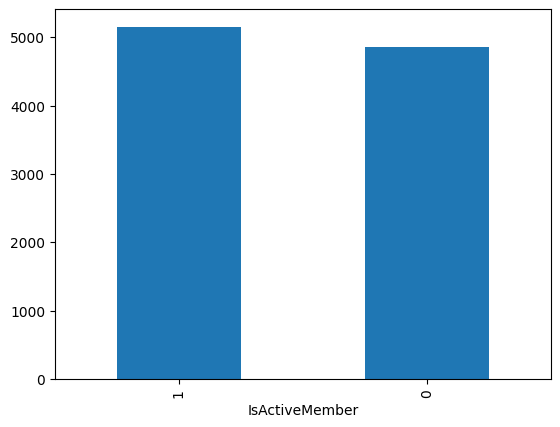

**************************************************
NumOfProducts
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


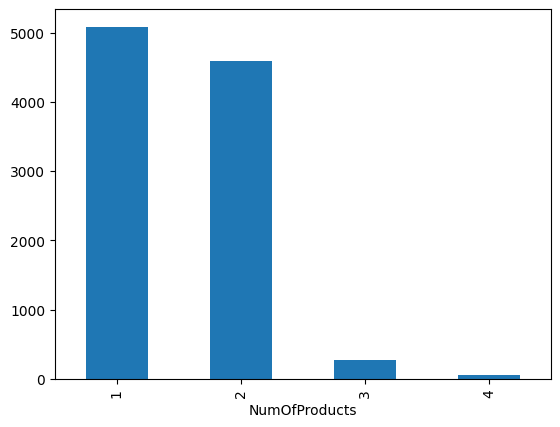

**************************************************
Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


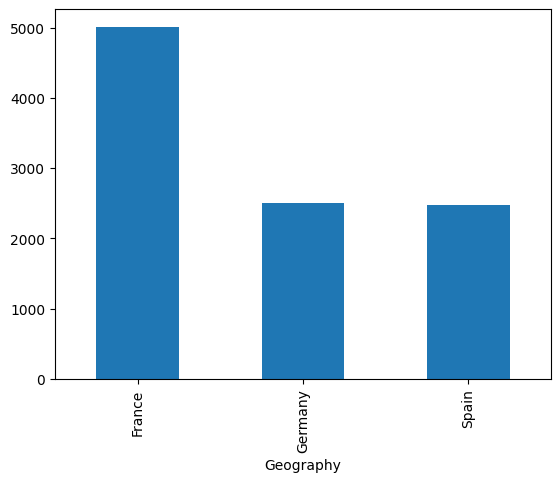

**************************************************
Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


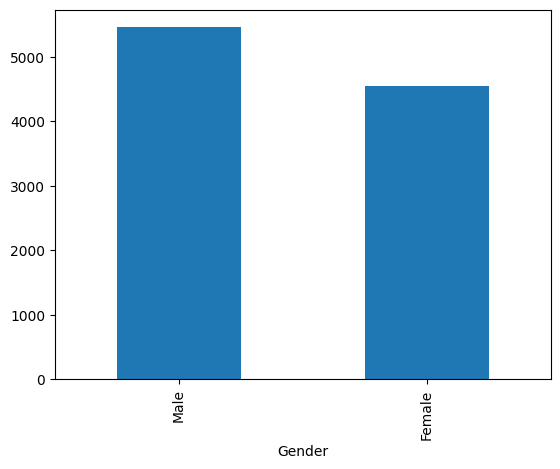

**************************************************
Exited
Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


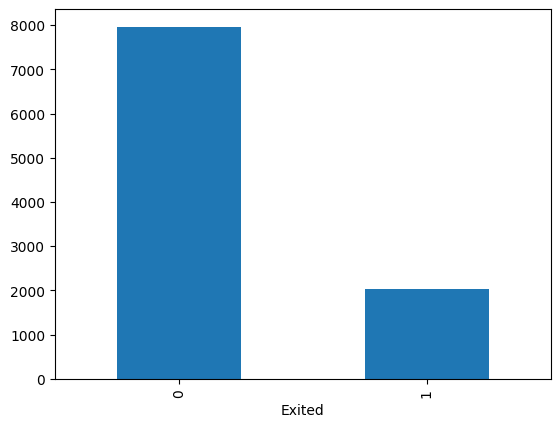

**************************************************
HasCrCard
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


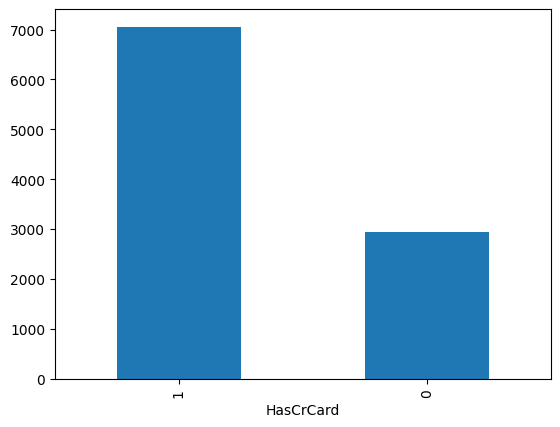

**************************************************
Tenure
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


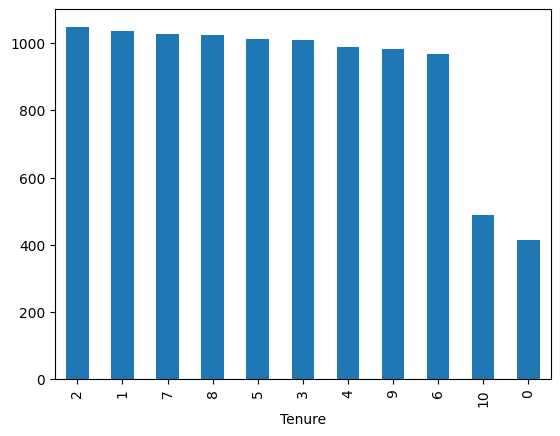

**************************************************


In [207]:
for feat in cat_feat:
  print(feat)
  print(df[feat].value_counts())
  print(df[feat].value_counts(normalize=True)*100)
  print(df[feat].value_counts().plot.bar())
  plt.show()
  print("*"*50)

In [208]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


EstimatedSalary


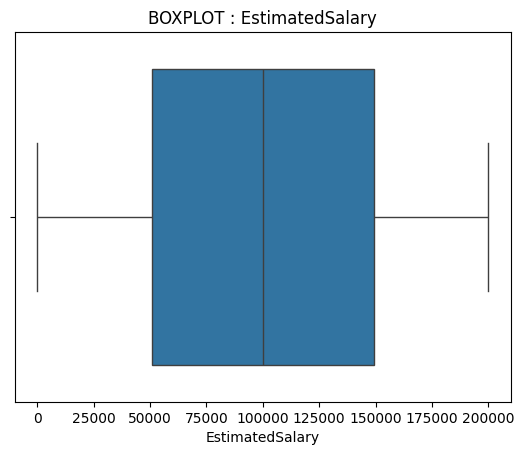

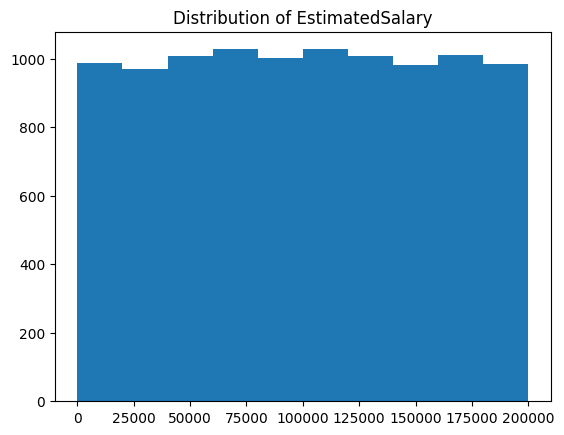

**************************************************
Balance


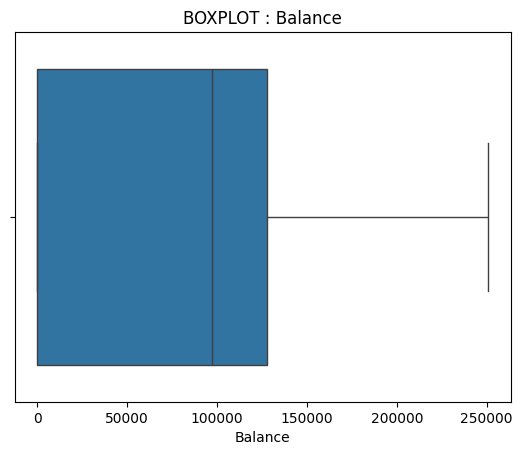

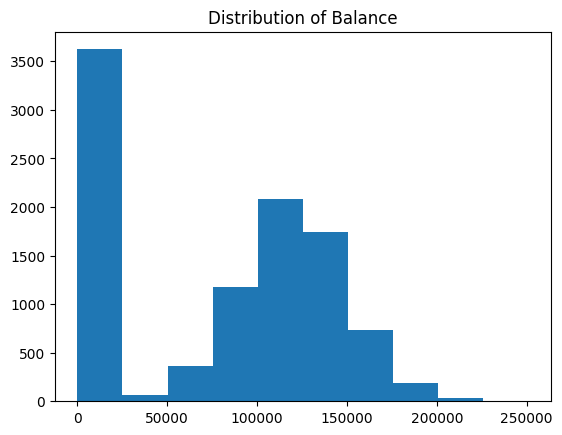

**************************************************
CreditScore


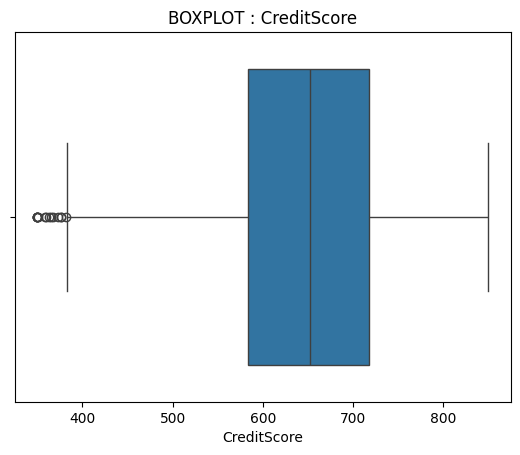

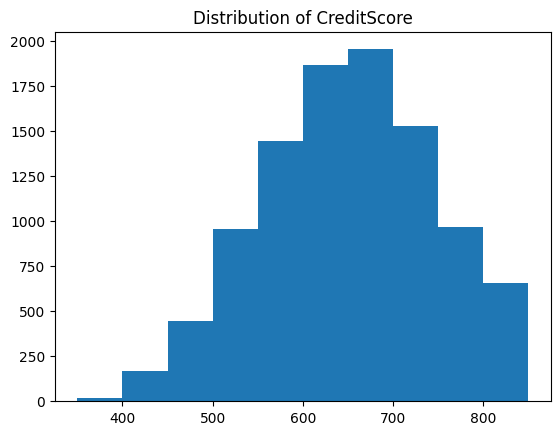

**************************************************
Age


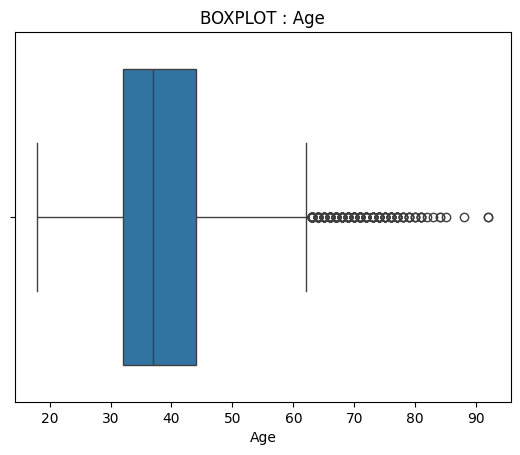

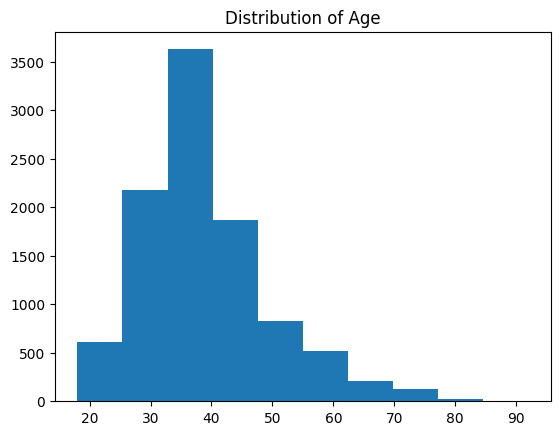

**************************************************


In [209]:
# Numerical
for feat in num_feat:
  print(feat)
  plt.title(f"BOXPLOT : {feat}")
  sns.boxplot(df[feat], orient='h')
  plt.show()
  plt.hist(df[feat])
  plt.title(f"Distribution of {feat}")
  plt.show()
  print("*"*50)

EstimatedSalary


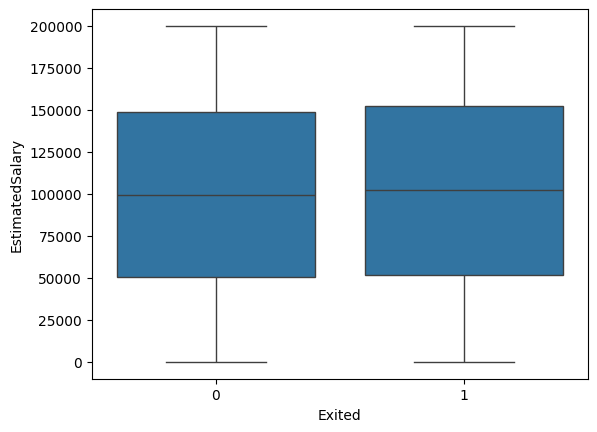

**************************************************
Balance


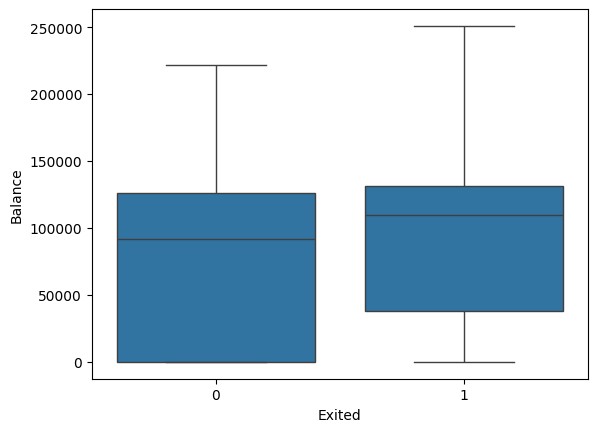

**************************************************
CreditScore


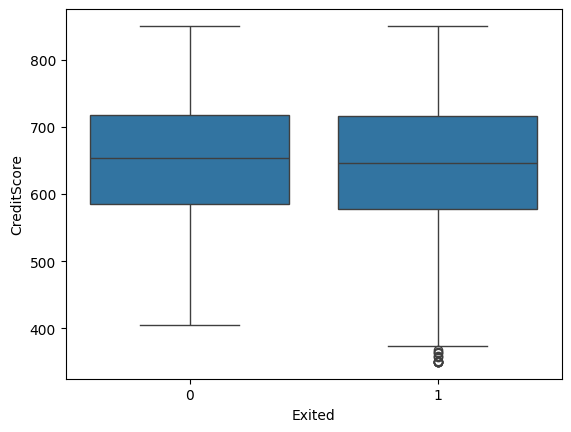

**************************************************
Age


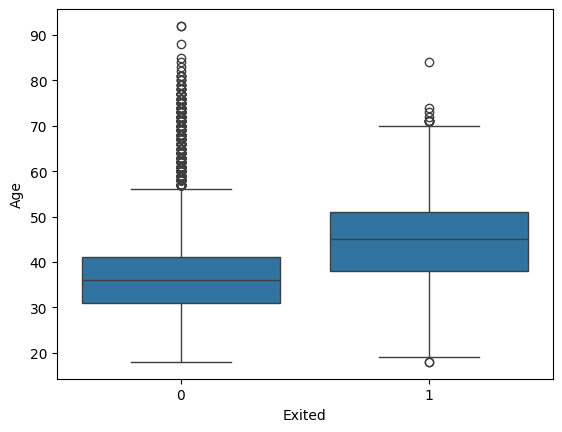

**************************************************


In [210]:
# Bivariate Analysis
for feat in num_feat:
  print(feat)
  sns.boxplot(x='Exited',y=feat,data=df)
  plt.show()
  print("*"*50)

<Axes: >

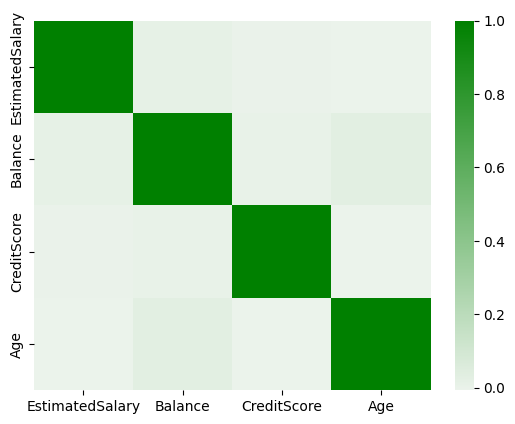

In [211]:
cmap=sns.light_palette("green",as_cmap=True)
sns.heatmap(df[num_feat].corr(),cmap=cmap)

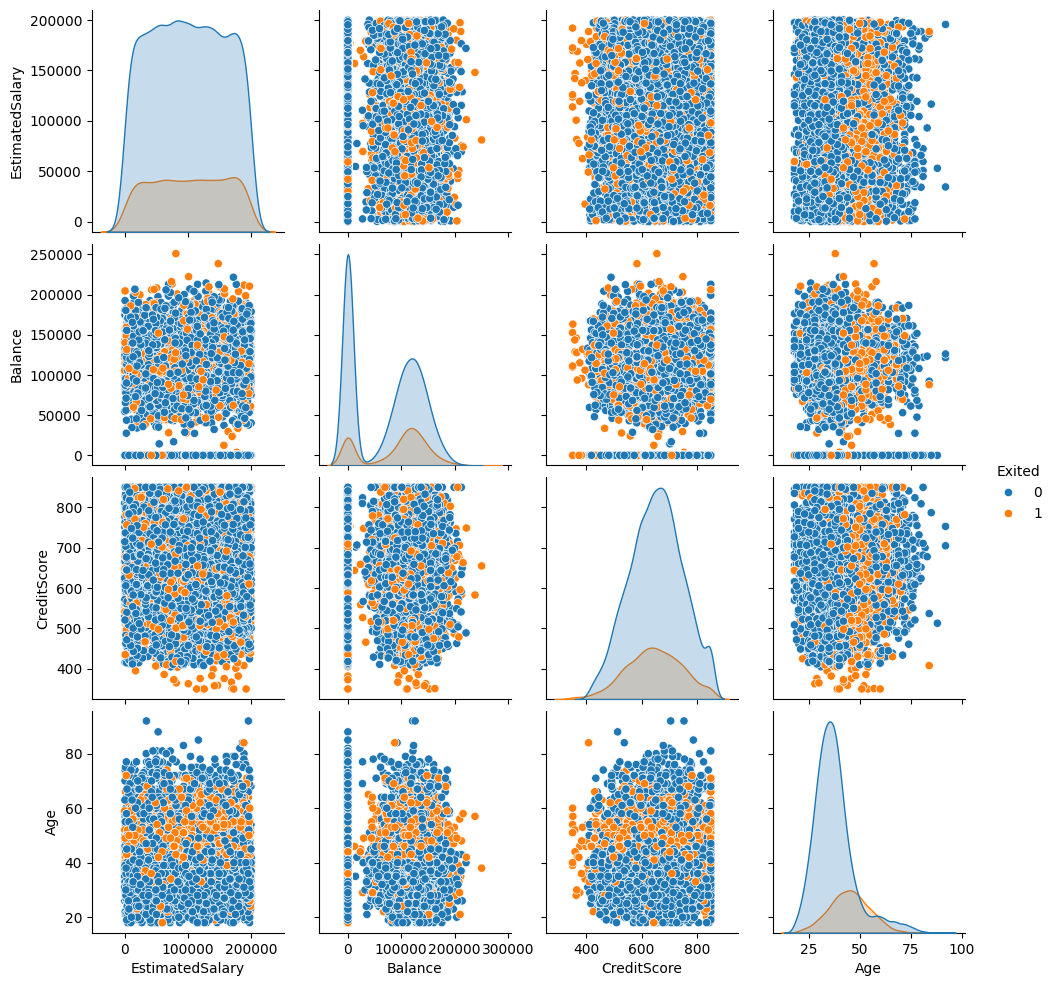

In [212]:
sns.pairplot(df[num_feat +["Exited"]],hue='Exited')

IsActiveMember


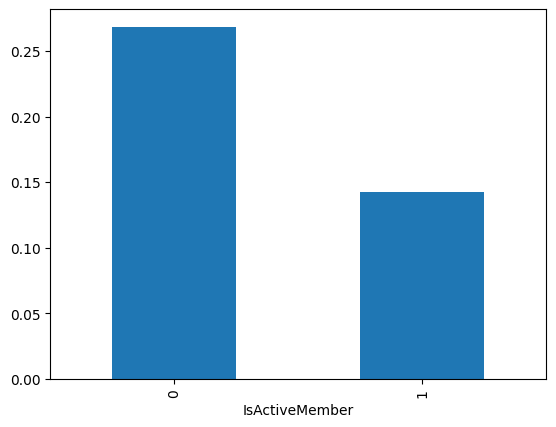

NumOfProducts


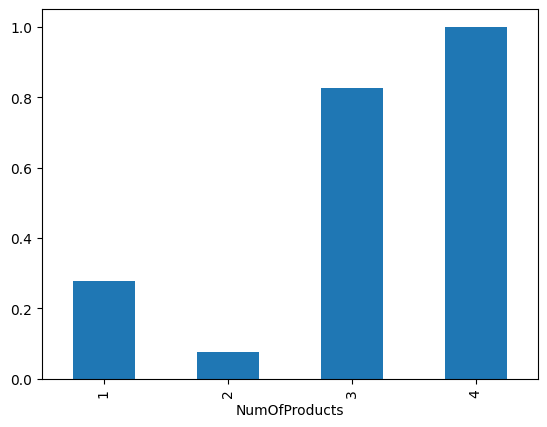

Geography


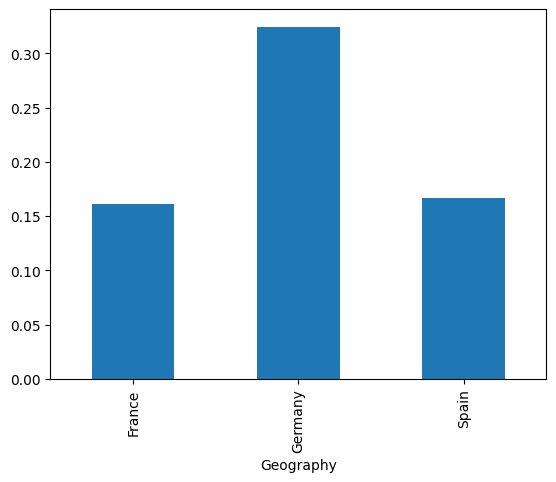

Gender


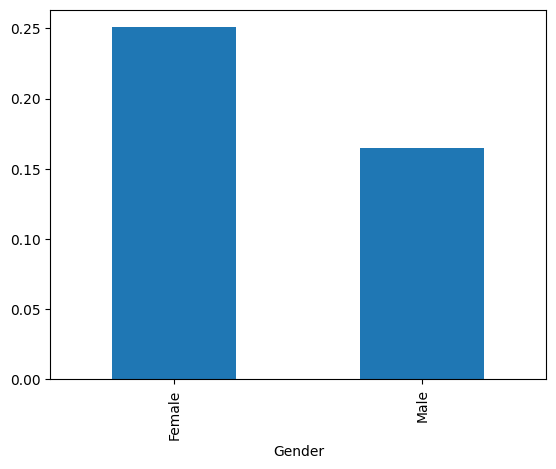

Exited


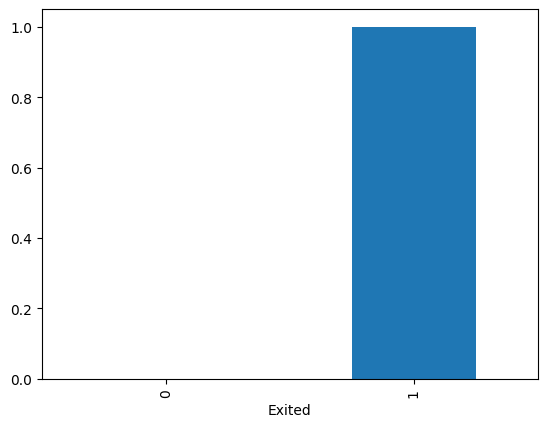

HasCrCard


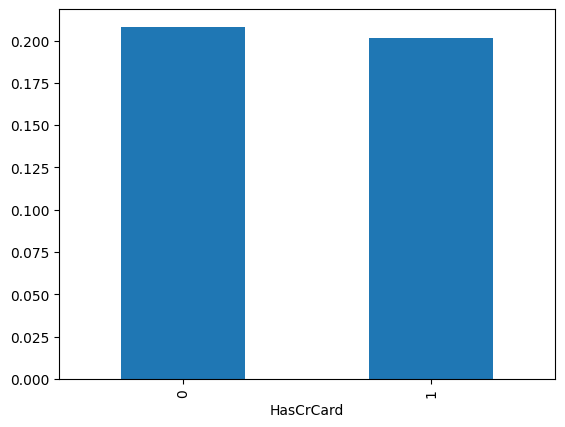

Tenure


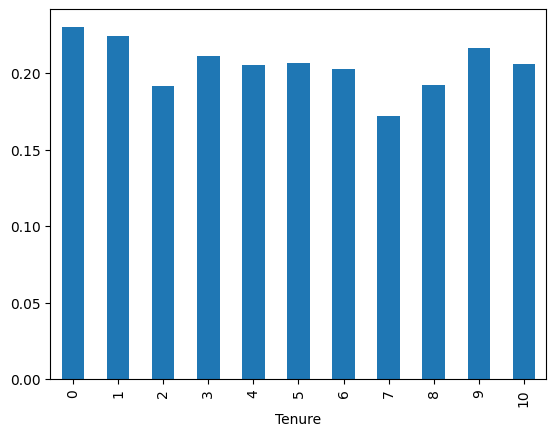

In [213]:
# Bivarte analysis of categorical datapoints
for feat in cat_feat:
  # df.groupby(feat)['Exited'].mean()
  print(feat)
  df.groupby(feat)['Exited'].mean().plot.bar()
  plt.show()

# Baseline Model


### People who have churn
Anyone who had more than 2 products

Anyone from Germany

People who were not active

In [214]:
def base_model_0(row):
  return 0

def base_model(row):
  if row['Tenure']<3 and row['IsActiveMember']==0:
    return 1 # Churn
  else:
    return 0 # Not Churn

def base_model_2(row):
  if row['NumOfProducts']>2 :
    return 1
  else:
    return 0


def base_model_3(row):
  if (row['IsActiveMember'] == 0 and (row['Age'] > 40 or row['Geography'] == 'Germany')) or (row['NumOfProducts'] > 2):
    return 1 # Churn
  else:
    return 0 # Not Churn

def base_model_4(row):
  if row['Age']<18:
    return 1
  else:
    return 0

df['base_prediction']=df.apply(base_model_3,axis=1)

df['base_prediction_0']=df.apply(base_model_0,axis=1)
print(classification_report(df['Exited'],df['base_prediction_0']))

df['base_prediction']=df.apply(base_model,axis=1)
print(classification_report(df['Exited'],df['base_prediction']))


df['base_prediction_2']=df.apply(base_model_2,axis=1)
print(classification_report(df['Exited'],df['base_prediction_2']))

df['base_prediction_3']=df.apply(base_model_3,axis=1)
print(classification_report(df['Exited'],df['base_prediction_3']))


df['base_prediction_4']=df.apply(base_model_4,axis=1)
print(classification_report(df['Exited'],df['base_prediction_4']))


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      7963
           1       0.00      0.00      0.00      2037

    accuracy                           0.80     10000
   macro avg       0.40      0.50      0.44     10000
weighted avg       0.63      0.80      0.71     10000

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      7963
           1       0.29      0.16      0.21      2037

    accuracy                           0.75     10000
   macro avg       0.55      0.53      0.53     10000
weighted avg       0.70      0.75      0.72     10000

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      7963
           1       0.86      0.14      0.24      2037

    accuracy                           0.82     10000
   macro avg       0.84      0.57      0.57     10000
weighted avg       0.83      0.82      0.76     10000

              preci

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Machine Learning

In [215]:
categorical_features + numerical_features

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'EstimatedSalary']

In [216]:
# #Onehot encoder
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(sparse=False)

# pd.get_dummies

In [217]:
# Feature Encoding
df['Geography']=df['Geography'].map({'France':0,'Germany':1,'Spain':2}).astype('int')
df['Gender']=df['Gender'].map({'Female':0,'Male':1}).astype('int')

In [218]:
#One

In [219]:
#Predictores
X=df[categorical_features + numerical_features]
#Target
y=df['Exited']

In [220]:
X.shape

(10000, 10)

In [221]:
y.shape

(10000,)

In [222]:
X.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0,0,1,1,1,619,42,2,0.00,101348.88
1,2,0,1,0,1,608,41,1,83807.86,112542.58
2,0,0,3,1,0,502,42,8,159660.80,113931.57
3,0,0,2,0,0,699,39,1,0.00,93826.63
4,2,0,1,1,1,850,43,2,125510.82,79084.10


In [223]:
from sklearn.model_selection import train_test_split
# Split into train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [224]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(7000, 10) (3000, 10) (7000,) (3000,)


In [225]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_lr=log_reg.predict(X_test)
print(classification_report(y_test,y_pred_lr))



              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.42      0.09      0.14       584

    accuracy                           0.80      3000
   macro avg       0.62      0.53      0.52      3000
weighted avg       0.74      0.80      0.74      3000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2416
           1       0.48      0.50      0.49       584

    accuracy                           0.80      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.80      0.80      0.80      3000



In [227]:
# Homework
# Try with different ML models with some hyperparameter tuning, gridsearch


# Deep Learning

In [228]:
# Imports
from keras.models import Sequential
from keras.layers import Dense

from keras import optimizers
from keras import metrics

In [229]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [230]:
classifier = Sequential()
classifier.add(Dense(64,activation='relu',input_dim=X_train.shape[1])) # Hidden Layer-1
classifier.add(Dense(32,activation='relu'))
# classifier.add(Dense(32,activation='relu'))
# classifier.add(Dense(32,activation='relu'))
classifier.add(Dense(1,activation='sigmoid')) # Output Layer
classifier.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [231]:
#Compile
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#training
history=classifier.fit(X_train,y_train,batch_size=32,epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7815 - loss: 0.5178 - val_accuracy: 0.8283 - val_loss: 0.4065
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8214 - loss: 0.4136 - val_accuracy: 0.8507 - val_loss: 0.3671
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8443 - loss: 0.3787 - val_accuracy: 0.8553 - val_loss: 0.3537
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8571 - loss: 0.3496 - val_accuracy: 0.8613 - val_loss: 0.3481
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8582 - loss: 0.3478 - val_accuracy: 0.8570 - val_loss: 0.3502
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8575 - loss: 0.3396 - val_accuracy: 0.8630 - val_loss: 0.3450
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.3453 - val_accuracy: 0.8623 - val_loss: 0.3426
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8598 - loss: 0.3456 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


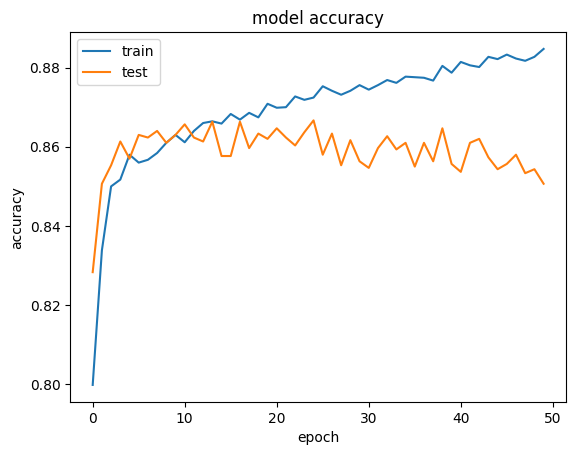

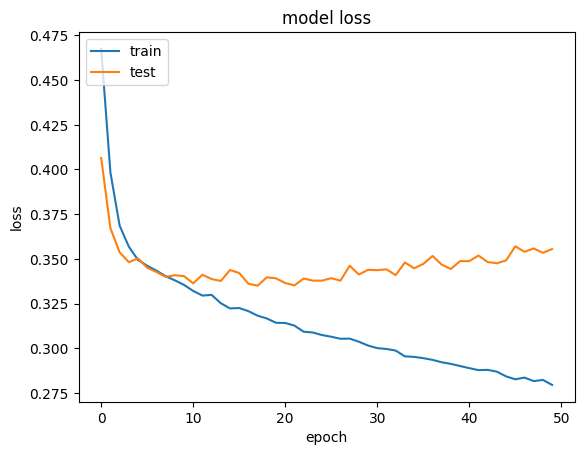

In [232]:
#List all data in history
print(history.history.keys())

#Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [233]:
#Predictions
y_pred_dl=classifier.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8476473906831171


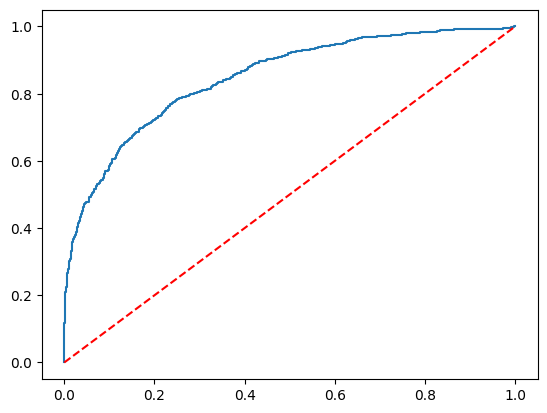

In [234]:
#ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dl)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot
plt.figure()
plt.plot(fpr,tpr, label=f"AUC = {roc_auc}")
plt.plot([0,1],[0,1],"r--", label="Random Guess")
plt.show()

In [235]:

y_pred_dl1=[]
for i in y_pred_dl:
  if i>0.6:
    y_pred_dl1.append(1)
  else:
    y_pred_dl1.append(0)

print(classification_report(y_test,y_pred_dl1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.45      0.56       584

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.74      3000
weighted avg       0.85      0.86      0.85      3000

